In [1]:

arch_map = {'': 'Baseline',
            'AC': 'Adaptive Clipper',
            'MF': 'Median Filter',
            'ranger': 'Ranger',
            'SR': 'Swap ReLU6',
            'TMR': 'TMR'
 }

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

os.chdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/") if file_path.startswith("FSIM_W_local_lenet") and not file_path.endswith('gz')]
# print(log_folders)

general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
for layer_conf in log_folders:
    model = layer_conf.split('_')[3]
    architecture = ''
    if len(layer_conf.split('_')) == 5:
        architecture = layer_conf.split('_')[4]
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:
            # print(architecture)
            # if not (architecture == 'SR' and cnf=='lyr2_JOBID0_W'):
                file_path = os.path.join(folder_path, cnf)

                report_path = os.path.join(file_path, "fsim_full_report.csv")
                report = pd.read_csv(report_path)
                report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

                report.drop(columns=['Unnamed: 0'], inplace=True)
                report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
                
                report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
                report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
                report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
                report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

                report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
                report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
                report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
                report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

                report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
                report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
                report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
                report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

                report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
                report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
                report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
                report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
                report['Architecture'] = arch_map[architecture]
                general_report = pd.concat([general_report, report], axis=0, ignore_index=True)

                new_path = os.path.join(file_path, "Misclassified_images_report.csv")
                additional_report = pd.read_csv(new_path)
                additional_report['model'] = 'LeNet5'
                additional_report['Architecture'] = arch_map[architecture]
                additional_report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
                new_report = pd.concat([new_report, additional_report], axis=0, ignore_index=True)
                new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"



In [4]:
general_report[general_report['Architecture'] == 'Baseline']

,layer,kernel,channel,row,col,bitmask,gold_ACC@1,gold_ACC@k,img_Top1_Crit,img_Top1_SDC,...,AbsF1Dk,MRRD,MRRDk,AbsrD,AbsRDk,MRPD,MRPDk,AbsPD,AbsPDk,Architecture
48070,2,36,266,NaN,NaN,1048576,98.0,100.0,0.0,6.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
48071,2,87,381,NaN,NaN,268435456,98.0,100.0,0.0,26.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
48072,2,13,350,NaN,NaN,2097152,98.0,100.0,0.0,24.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
48073,2,87,336,NaN,NaN,1073741824,98.0,100.0,0.0,18.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
48074,2,25,161,NaN,NaN,16777216,98.0,100.0,0.0,8.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65695,1,12,0,2.0,2.0,4194304,98.0,100.0,0.0,95.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
65696,1,15,2,3.0,1.0,8388608,98.0,100.0,0.0,100.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
65697,1,15,4,1.0,3.0,536870912,98.0,100.0,0.0,100.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline
65698,1,15,3,3.0,2.0,4194304,98.0,100.0,0.0,100.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,Baseline


In [3]:
general_report[general_report['Architecture']== 'Swap ReLU6']['layer'].unique()

array([2, 0, 4, 3, 1])

## Fault distribution

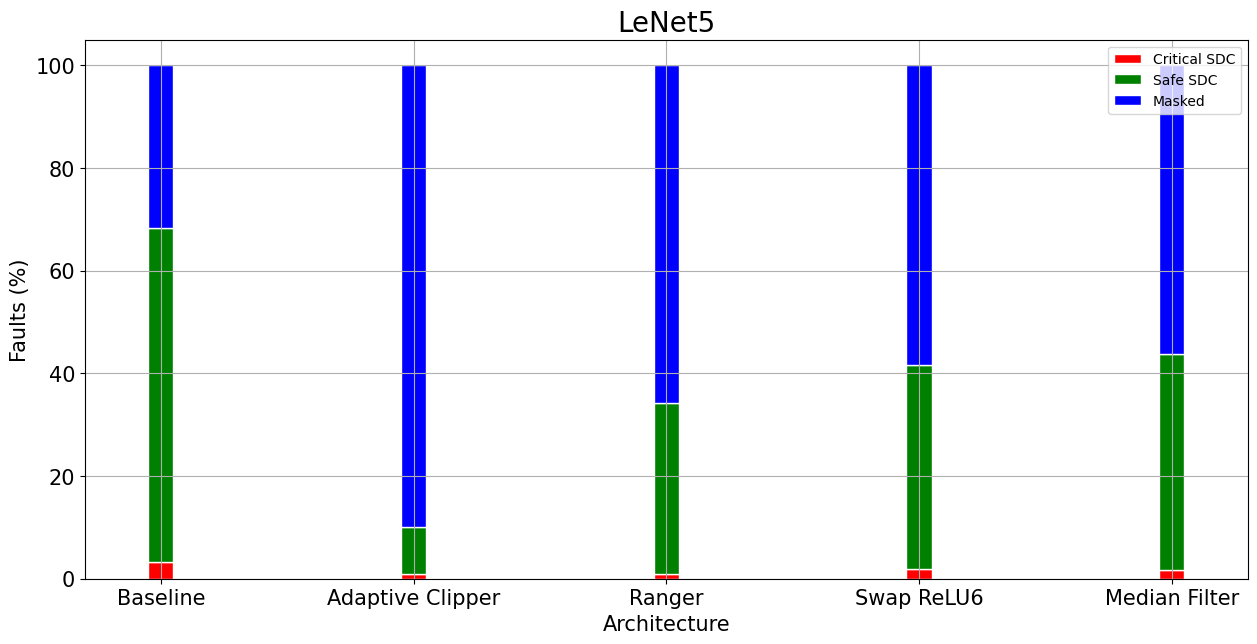

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,7))

general_report.rename(columns={'img_Top1_Crit': 'Critical SDC',
                       'img_Top1_SDC': 'Safe SDC',
                       'img_Top1_Masked': 'Masked'}, inplace=True)

grouped_fd = general_report[['Critical SDC', 'Safe SDC', 'Masked', 'Architecture']].groupby('Architecture').mean()
new_order = ['Baseline', 'Adaptive Clipper', 'Ranger', 'Swap ReLU6', 'Median Filter']
grouped_fd = grouped_fd.reindex(new_order)

grouped_fd.plot(kind='bar', stacked=True, color=['red', 'green', 'blue' ], edgecolor='white', width=0.1, ax = ax, legend=True, rot=0)
grouped_fd.to_csv('/home/bepi/Desktop/Ph.D_/projects/APP_FI/code/APP_Fault_injections/report_analysis/HardeningEvaluations/weights/lenetFD.csv')



ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('Faults (%)', fontsize=15)
ax.set_xlabel('Architecture', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

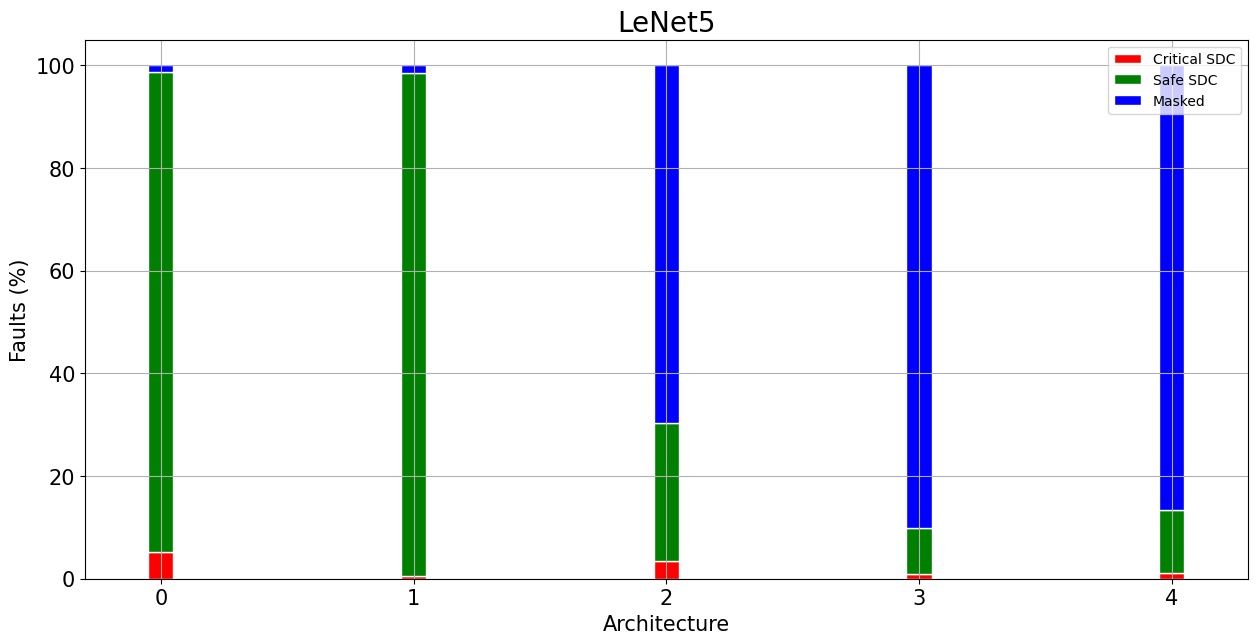

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,7))

general_report.rename(columns={'img_Top1_Crit': 'Critical SDC',
                       'img_Top1_SDC': 'Safe SDC',
                       'img_Top1_Masked': 'Masked'}, inplace=True)

grouped_fd = general_report[general_report['Architecture']=='Swap ReLU6'][['Critical SDC', 'Safe SDC', 'Masked', 'layer']].groupby('layer').mean()
# new_order = ['Baseline', 'Adaptive Clipper', 'Ranger', 'Swap ReLU6', 'Median Filter']
# grouped_fd = grouped_fd.reindex(new_order)

grouped_fd.plot(kind='bar', stacked=True, color=['red', 'green', 'blue' ], edgecolor='white', width=0.1, ax = ax, legend=True, rot=0)



ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('Faults (%)', fontsize=15)
ax.set_xlabel('Architecture', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## Accuracy of the corrupted NN
#### (The accuracy is evaluated considering only the top1 prediction)

In [40]:
new_row= {'layer': 3,
          'fault_ACC@1': 97.0,
          'Architecture': 'Baseline'}
new_new_report= general_report.append(new_row, ignore_index=True)
print(general_report[general_report['Architecture']=='Baseline']['layer'].unique())
print(new_new_report[new_new_report['Architecture']=='Baseline']['layer'].unique())

[2 0 4 1]
[2 0 4 1 3]


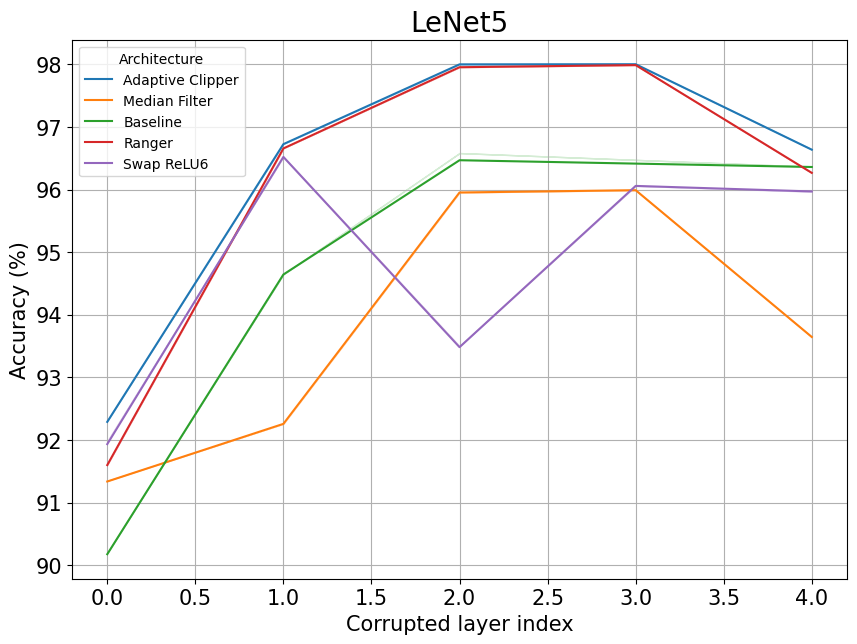

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
# sns.stripplot(data=general_report, x='layer', y='fault_ACC@1', hue='Architecture', ax = ax, dodge=True, alpha=.2)
sns.lineplot(data=general_report, x='layer', y='fault_ACC@1', hue='Architecture', ax = ax, markers='*', ci=False)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Corrupted layer index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

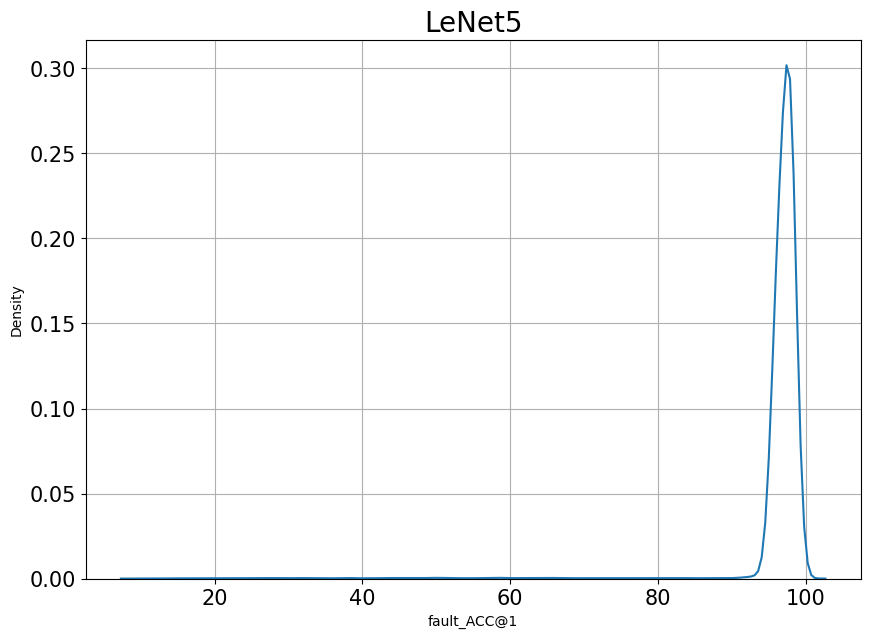

In [40]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.kdeplot(data=general_report[general_report['layer']==2], x='fault_ACC@1', ax = ax, palette='tab10')

ax.set_title('LeNet5', fontsize=20)
ax.grid()
# ax.set_ylabel('Accuracy (%)', fontsize=15)
# ax.set_xlabel('Corrupted layer index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

In [5]:
general_report[general_report['bit_faulty_pos']==30].groupby('Architecture')['fault_ACC@1'].mean()

Architecture
Adaptive Clipper    88.563725
Baseline            59.744009
Median Filter       79.015461
Ranger              87.053996
Swap ReLU6          75.234642
Name: fault_ACC@1, dtype: float64

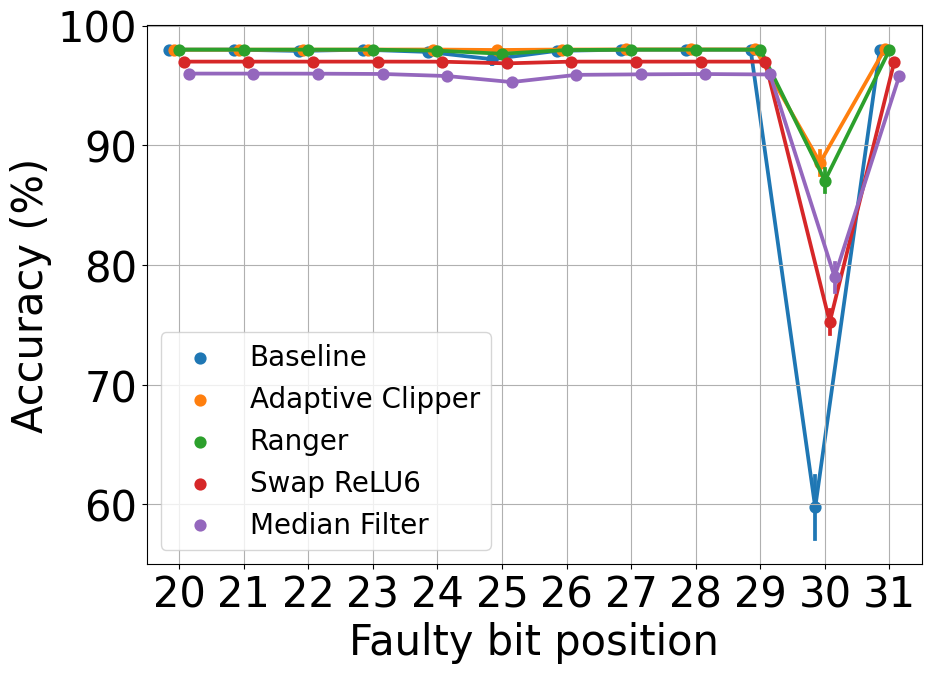

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
legend_order = ['Baseline', 'Adaptive Clipper', 'Ranger', 'Swap ReLU6', 'Median Filter']
# sns.stripplot(data=general_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Architecture', ax = ax, dodge=True, alpha=.2)
sns.pointplot(data=general_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Architecture', ax = ax, dodge=0.3, linestyle="none", markers="o", markersize=40, 
               legend=False, hue_order=legend_order)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
# ax.set_title('LeNet5', fontsize=20)

ax.grid()
ax.legend(fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=30)
ax.set_xlabel('Faulty bit position', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

AttributeError: 'numpy.ndarray' object has no attribute 'grid'

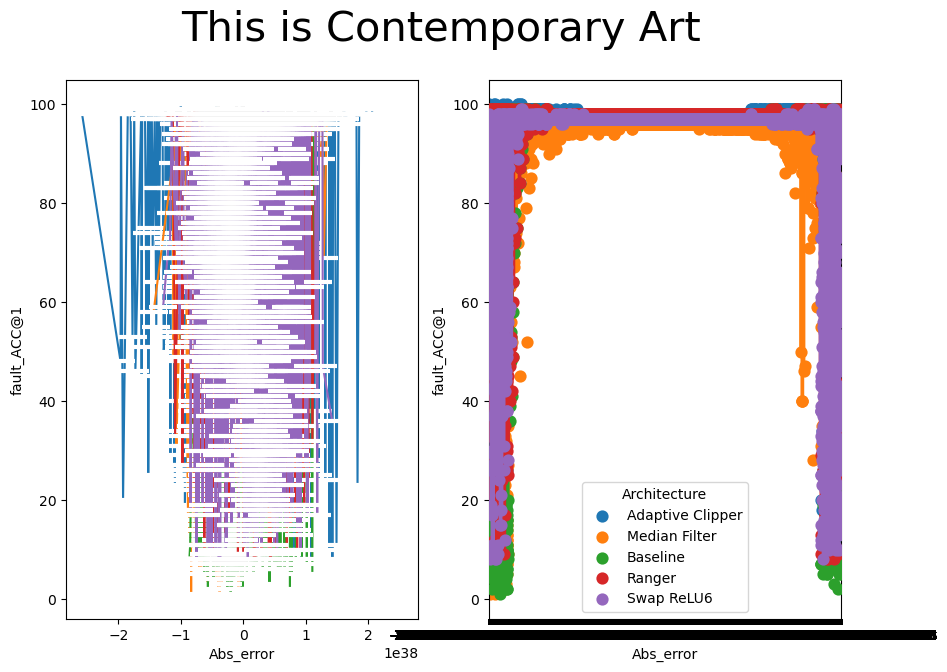

: 

In [55]:
fig, ax = plt.subplots(1,2,figsize=(10,7))
# sns.stripplot(data=general_report, x='Abs_error', y='fault_ACC@1', hue='Architecture', ax = ax, dodge=True, alpha=.2)
sns.lineplot(data=general_report, x='Abs_error', y='fault_ACC@1', hue='Architecture', ax = ax[0], marker="_", 
              markersize=20, markeredgewidth=3, legend=False)
sns.pointplot(data=general_report, x='Abs_error', y='fault_ACC@1', hue='Architecture', ax = ax[1], marker="_", 
              markersize=20, markeredgewidth=3, legend=False)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
fig.suptitle('This is Contemporary Art', fontsize=30)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Absolute error', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Let's isolate bit 30

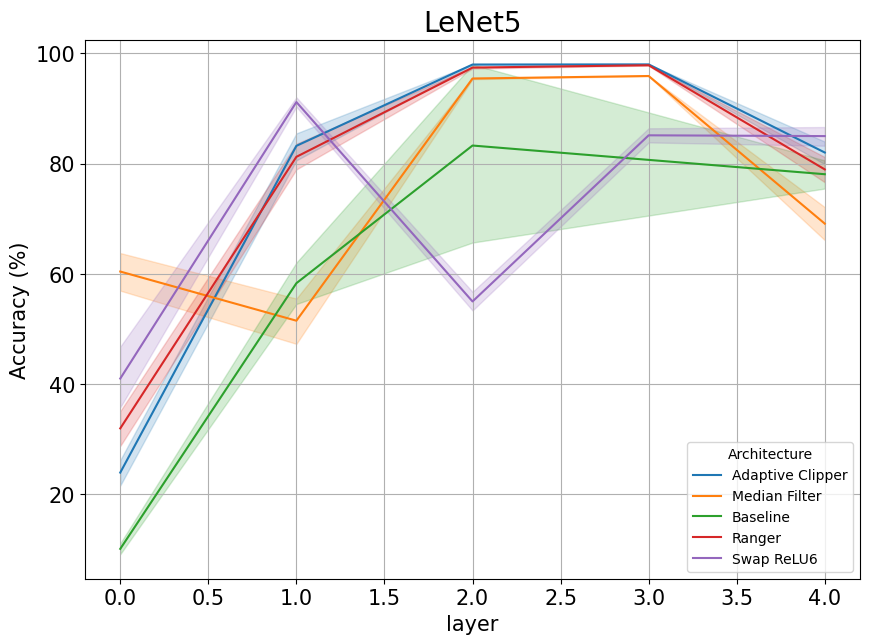

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data=general_report[general_report['bit_faulty_pos']==30], x='layer', y='fault_ACC@1', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('layer', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## NaN values in NN output

In [13]:
new_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147352 entries, 0 to 147351
Data columns (total 33 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    147352 non-null  int64  
 1   FaultID       147352 non-null  object 
 2   imID          147352 non-null  int64  
 3   layer         147352 non-null  int64  
 4   kernel        147352 non-null  int64  
 5   channel       147352 non-null  int64  
 6   row           88676 non-null   float64
 7   col           88676 non-null   float64
 8   bitmask       147352 non-null  int64  
 9   G_Target      147352 non-null  int64  
 10  F_clas0       147352 non-null  int64  
 11  F_clas1       147352 non-null  int64  
 12  F_clas2       147352 non-null  int64  
 13  F_clas3       147352 non-null  int64  
 14  F_clas4       147352 non-null  int64  
 15  F_pred0       132878 non-null  float64
 16  F_pred1       132878 non-null  float64
 17  F_pred2       132878 non-null  float64
 18  F_pr

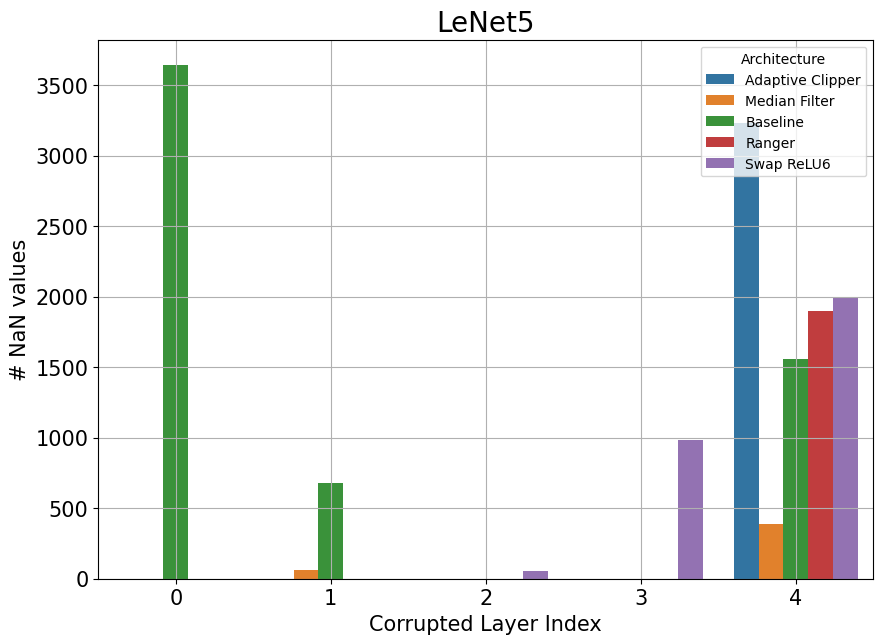

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.countplot(data = new_report.query("F_pred0.isnull()"), x='layer', hue='Architecture',  ax = ax)

ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('# NaN values', fontsize=15)
ax.set_xlabel('Corrupted Layer Index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

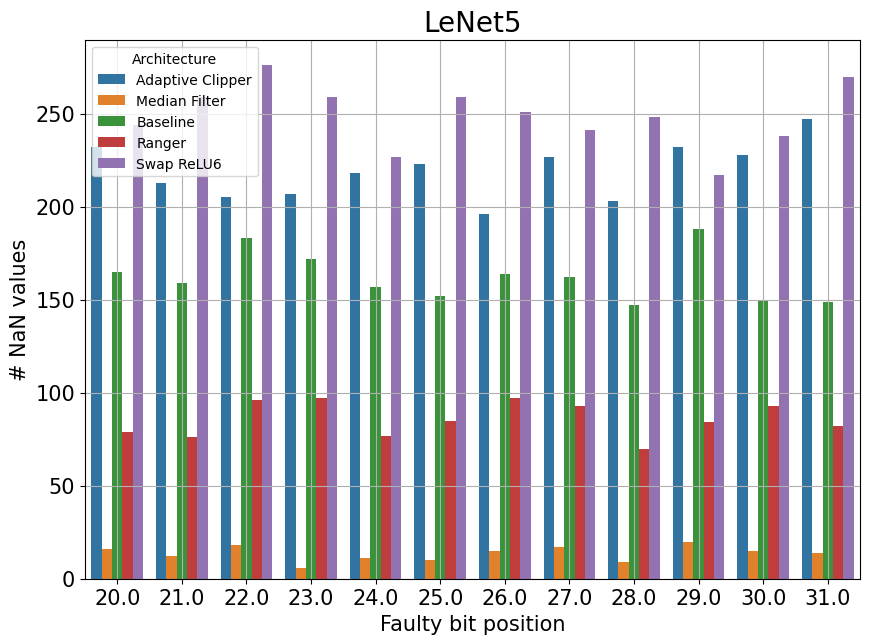

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.countplot(data = new_report.query("F_pred0.isnull()"), x='bit_faulty_pos', hue='Architecture',  ax = ax)

ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('# NaN values', fontsize=15)
ax.set_xlabel('Faulty bit position', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## Infinite values in NN output

In [3]:
new_report_numeric = new_report.apply(pd.to_numeric, errors='coerce')
infinity_mask = np.isinf(new_report_numeric)
infinity_report = new_report[infinity_mask.any(axis=1)]

ValueError: min() arg is an empty sequence

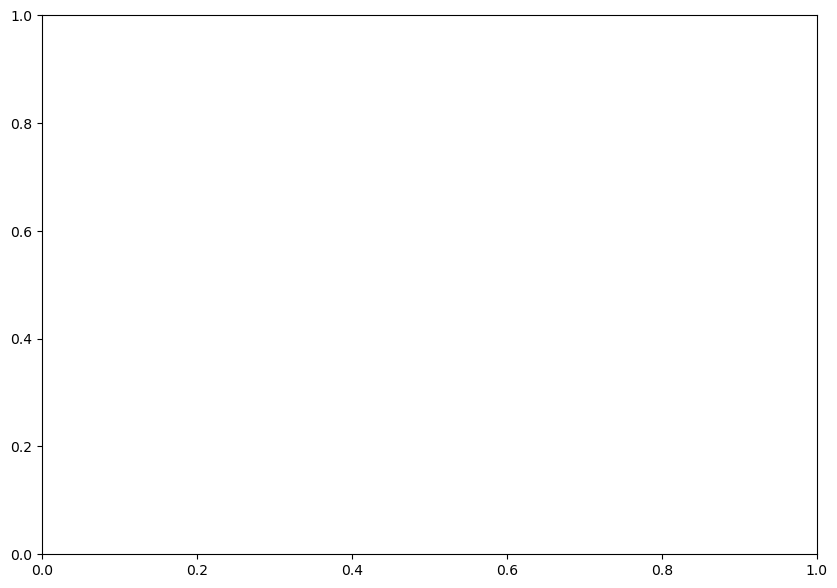

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.countplot(data = infinity_report, x='bit_faulty_pos', hue='Architecture',  ax = ax)

ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('# NaN values', fontsize=15)
ax.set_xlabel('Faulty bit position', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## Top1 - Top2 
#### It is worth to explore also this metric becuase, when models are deployed into a CPS, if the difference between the top1 and top2 predictions are too close, so if the model is not confident enough on the top1 prediction, it is discarded.
(A reference is needed)
# Here intinite and nan values must be discarded

In [5]:
new_report_numeric = new_report.apply(pd.to_numeric, errors='coerce')
infinity_mask = np.isinf(new_report_numeric)
non_infinity_report = new_report[~infinity_mask.any(axis=1)]

In [9]:
non_infinity_report['top_diff'] = abs(non_infinity_report['F_pred0'] - non_infinity_report['F_pred1'])/abs(non_infinity_report['F_pred0']+non_infinity_report['F_pred1']+non_infinity_report['F_pred2']+non_infinity_report['F_pred3']+non_infinity_report['F_pred4'])

In [10]:
non_infinity_report['top_diff'].describe()

count    132878.000000
mean          0.946812
std           0.181269
min           0.000140
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: top_diff, dtype: float64

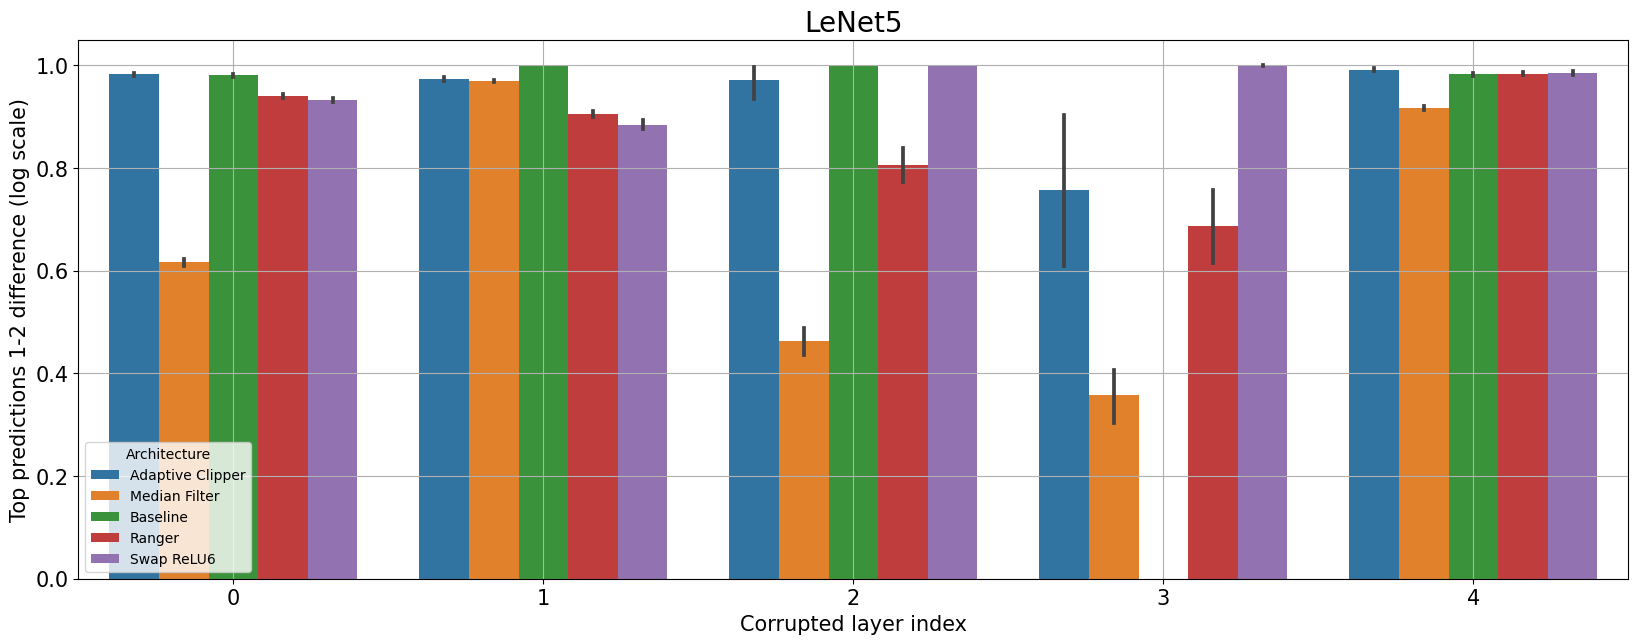

In [14]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.barplot(data=non_infinity_report, x='layer', y='top_diff', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('Top predictions 1-2 difference (log scale)', fontsize=15)
ax.set_xlabel('Corrupted layer index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

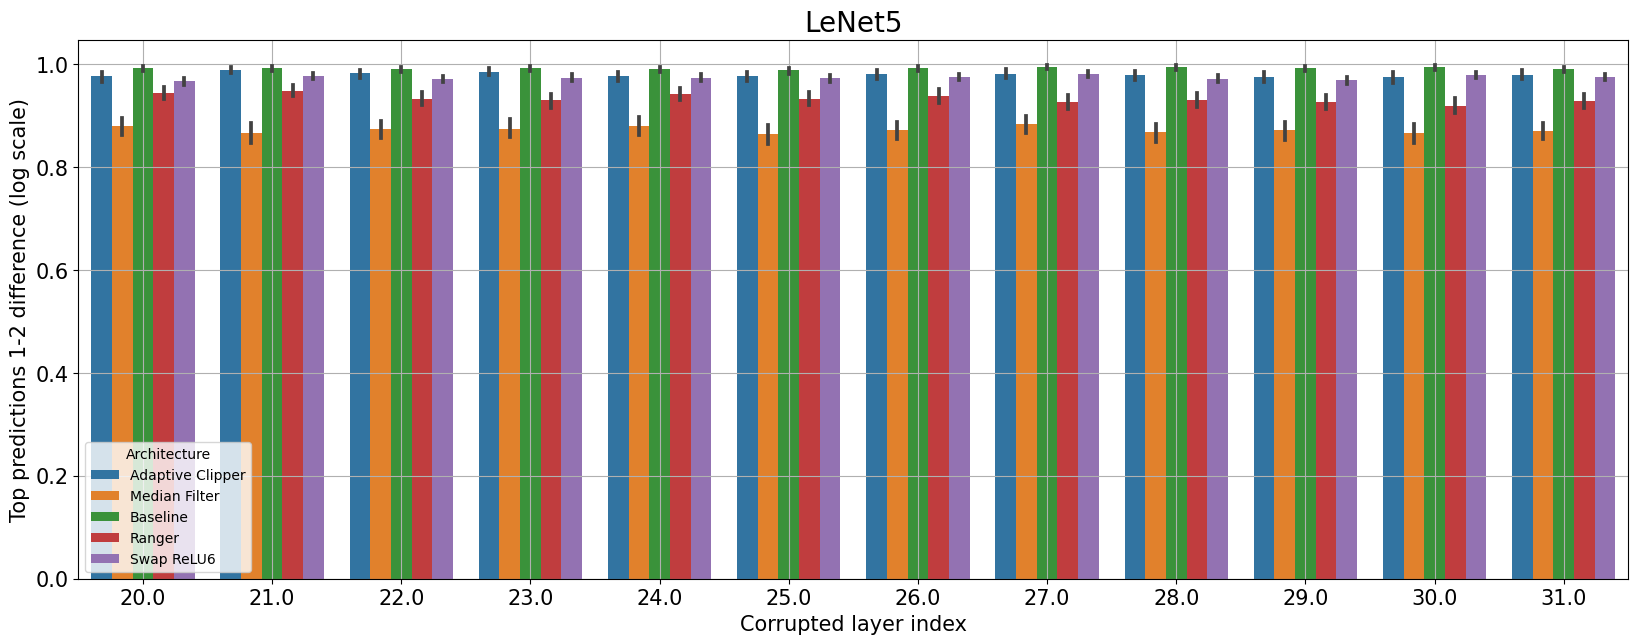

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.barplot(data=non_infinity_report, x='bit_faulty_pos', y='top_diff', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('LeNet5', fontsize=20)
ax.grid()
ax.set_ylabel('Top predictions 1-2 difference (log scale)', fontsize=15)
ax.set_xlabel('Corrupted layer index', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Distribution of different calsses occurences 

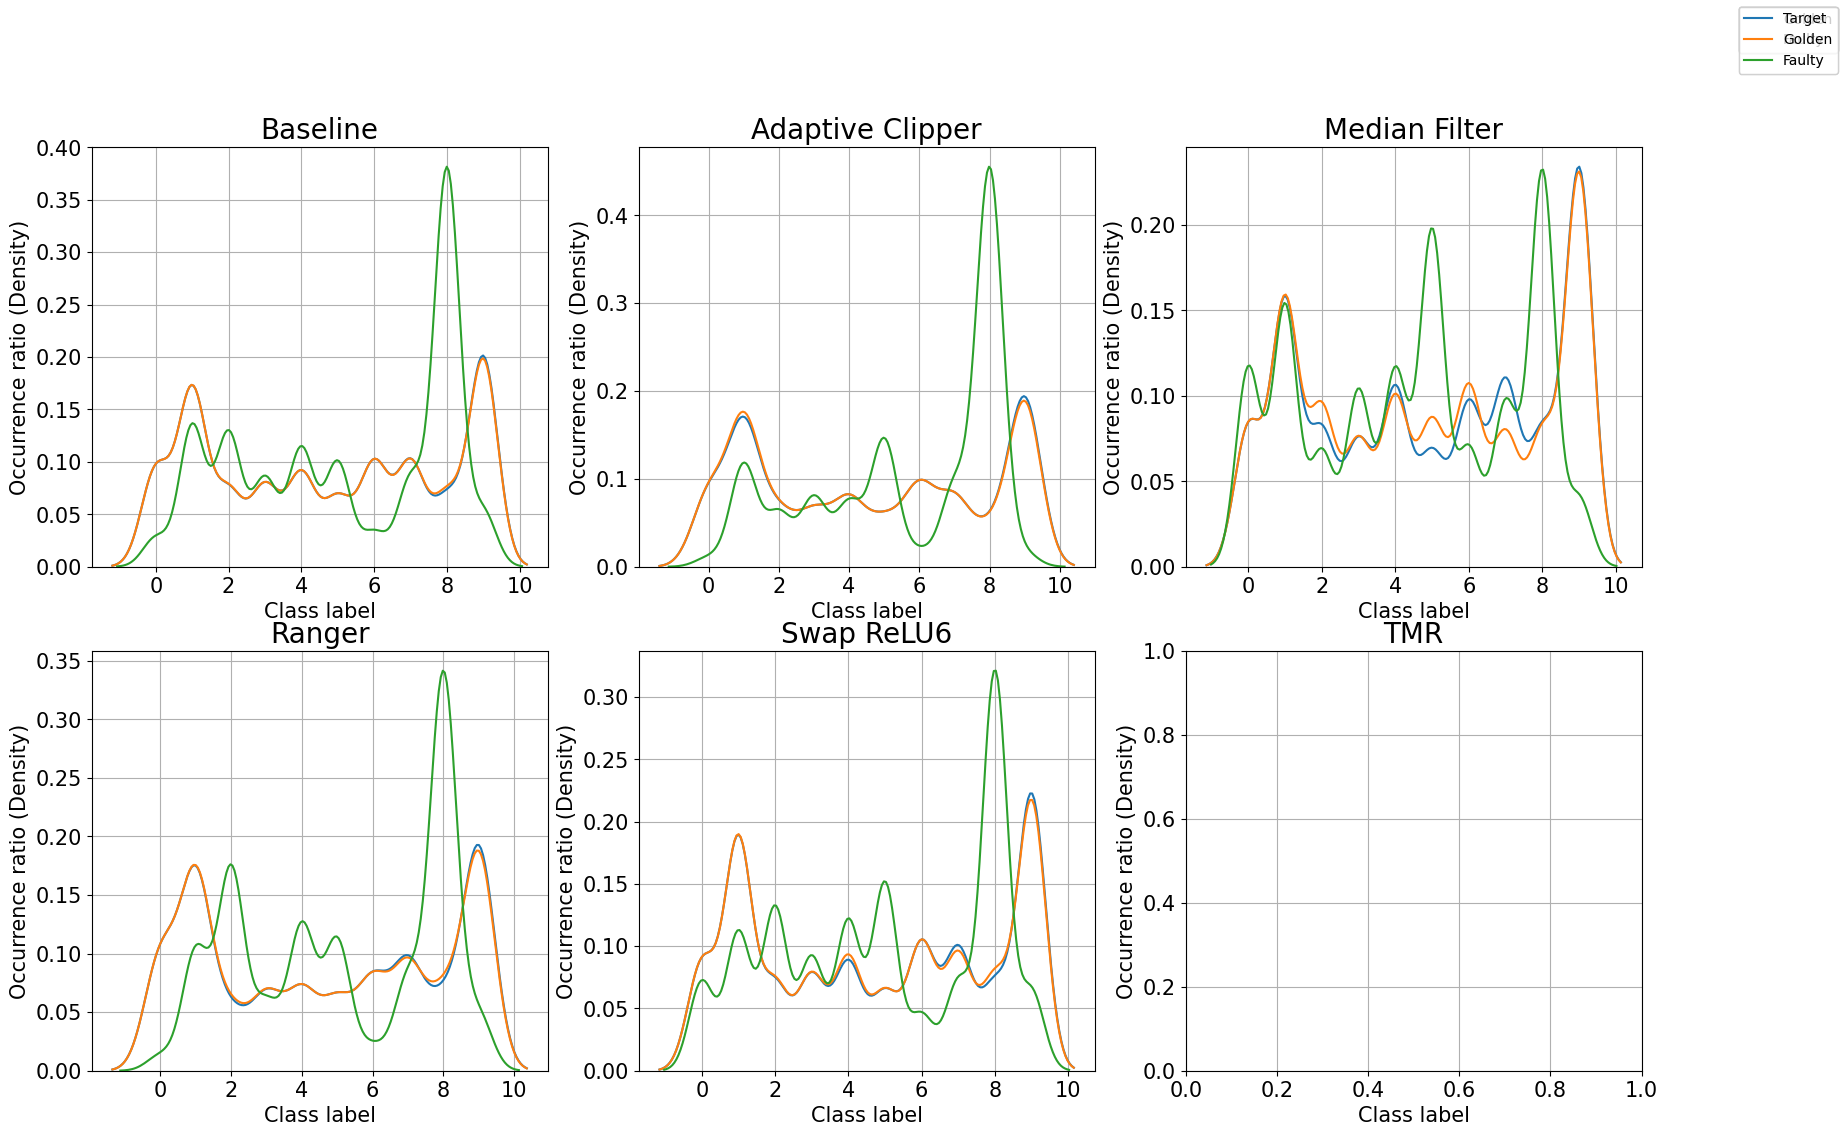

In [15]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Baseline'], x='G_Target', ax = ax[0][0], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Baseline'], x='G_clas0', ax = ax[0][0], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Baseline'], x='F_clas0', ax = ax[0][0], common_norm=True)
ax[0][0].set_title('Baseline', fontsize=20)
ax[0][0].grid()
ax[0][0].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][0].set_xlabel('Class label', fontsize=15)
ax[0][0].tick_params(axis='x', labelsize=15)
ax[0][0].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Target','Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper'], x='G_Target', ax = ax[0][1], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper'], x='G_clas0', ax = ax[0][1], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper'], x='F_clas0', ax = ax[0][1], common_norm= True)
ax[0][1].set_title('Adaptive Clipper', fontsize=20)
ax[0][1].grid()
ax[0][1].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][1].set_xlabel('Class label', fontsize=15)
ax[0][1].tick_params(axis='x', labelsize=15)
ax[0][1].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Median Filter'], x='G_Target', ax = ax[0][2], common_norm= True, common_grid=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Median Filter'], x='G_clas0', ax = ax[0][2], common_norm= True, common_grid=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Median Filter'], x='F_clas0', ax = ax[0][2], common_norm= True, common_grid=True)
ax[0][2].set_title('Median Filter', fontsize=20)
ax[0][2].grid()
ax[0][2].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][2].set_xlabel('Class label', fontsize=15)
ax[0][2].tick_params(axis='x', labelsize=15)
ax[0][2].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Ranger'], x='G_Target', ax = ax[1][0], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Ranger'], x='G_clas0', ax = ax[1][0], common_norm= True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Ranger'], x='F_clas0', ax = ax[1][0], common_norm= True)
ax[1][0].set_title('Ranger', fontsize=20)
ax[1][0].grid()
ax[1][0].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][0].set_xlabel('Class label', fontsize=15)
ax[1][0].tick_params(axis='x', labelsize=15)
ax[1][0].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6'], x='G_Target', ax = ax[1][1], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6'], x='G_clas0', ax = ax[1][1], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6'], x='F_clas0', ax = ax[1][1], common_norm=True)
ax[1][1].set_title('Swap ReLU6', fontsize=20)
ax[1][1].grid()
ax[1][1].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][1].set_xlabel('Class label', fontsize=15)
ax[1][1].tick_params(axis='x', labelsize=15)
ax[1][1].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='TMR'], x='G_Target', ax = ax[1][2], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='TMR'], x='G_clas0', ax = ax[1][2], common_norm=True)
sns.kdeplot(data=non_infinity_report[non_infinity_report['Architecture']=='TMR'], x='F_clas0', ax = ax[1][2], common_norm=True)
ax[1][2].set_title('TMR', fontsize=20)
ax[1][2].grid()
ax[1][2].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][2].set_xlabel('Class label', fontsize=15)
ax[1][2].tick_params(axis='x', labelsize=15)
ax[1][2].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Target','Golden', 'Faulty'])

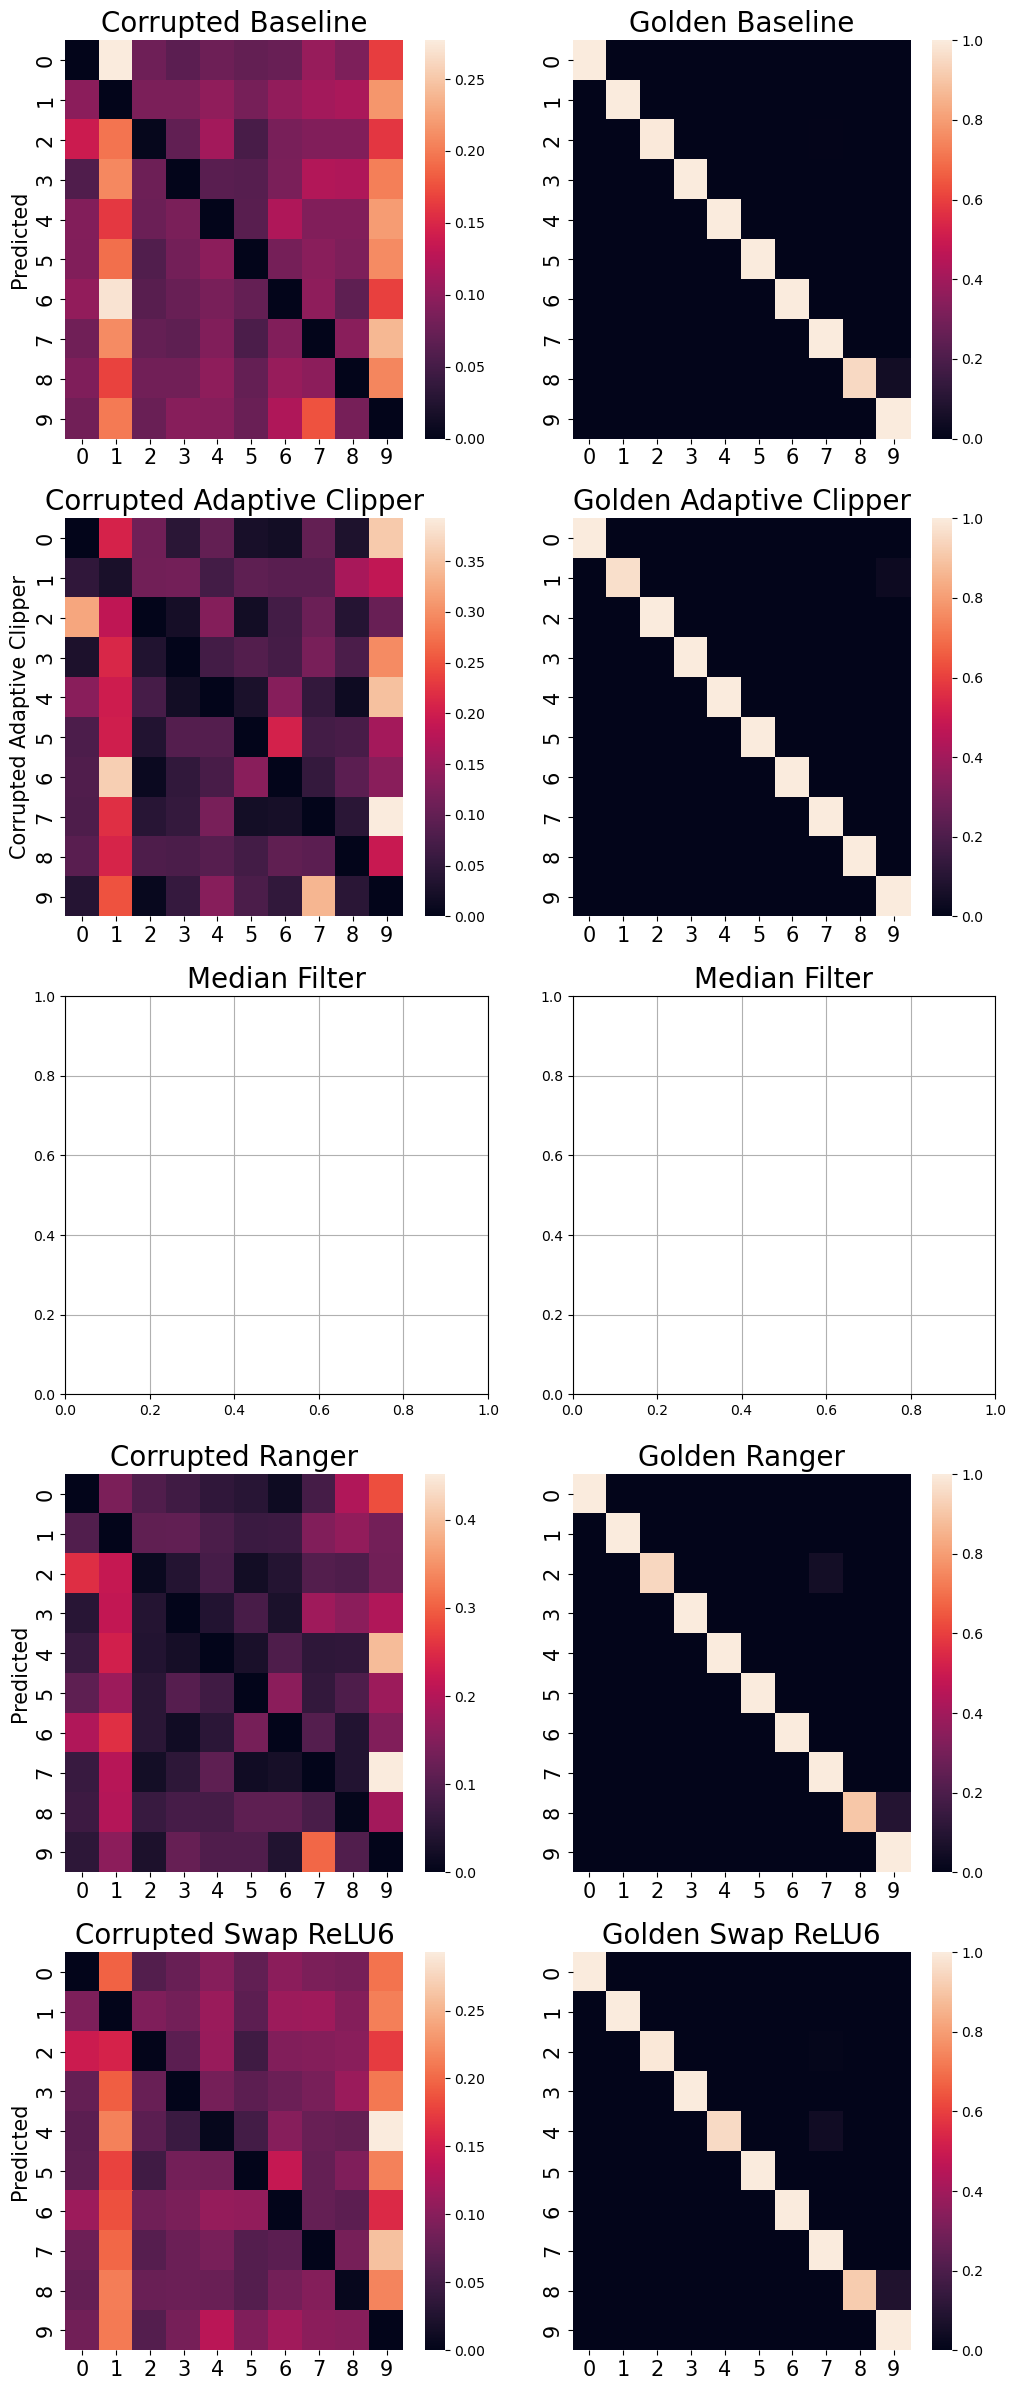

In [20]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(5,2,figsize=(12,30))
cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Baseline']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Baseline']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][0])
ax[0][0].set_title('Corrupted Baseline', fontsize=20)
# ax[0][0].grid()
ax[0][0].set_ylabel('Predicted', fontsize=15)
ax[0][0].set_xlabel('', fontsize=15)
ax[0][0].tick_params(axis='x', labelsize=15)
ax[0][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Baseline']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Baseline']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][1])
ax[0][1].set_title('Golden Baseline', fontsize=20)
# ax[0][1].grid()
ax[0][1].set_ylabel('', fontsize=15)
ax[0][1].set_xlabel('', fontsize=15)
ax[0][1].tick_params(axis='x', labelsize=15)
ax[0][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][0])
ax[1][0].set_title('Corrupted Adaptive Clipper', fontsize=20)
# ax[1][0].grid()
ax[1][0].set_ylabel('Corrupted Adaptive Clipper', fontsize=15)
ax[1][0].set_xlabel('', fontsize=15)
ax[1][0].tick_params(axis='x', labelsize=15)
ax[1][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Adaptive Clipper']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][1])
ax[1][1].set_title('Golden Adaptive Clipper', fontsize=20)
# ax[1][1].grid()
ax[1][1].set_ylabel('', fontsize=15)
ax[1][1].set_xlabel('', fontsize=15)
ax[1][1].tick_params(axis='x', labelsize=15)
ax[1][1].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['G_clas0'], normalize='true')
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][2])
ax[2][0].set_title('Median Filter', fontsize=20)
ax[2][0].grid()
# ax[2][0].set_ylabel('Predicted', fontsize=15)
# ax[2][0].set_xlabel('', fontsize=15)
# ax[2][0].tick_params(axis='x', labelsize=15)
# ax[2][0].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Median Filter']['G_Target'], normalize='true')
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][2])
ax[2][1].set_title('Median Filter', fontsize=20)
ax[2][1].grid()
# ax[2][1].set_ylabel('Predicted', fontsize=15)
# ax[2][1].set_xlabel('', fontsize=15)
# ax[2][1].tick_params(axis='x', labelsize=15)
# ax[2][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Ranger']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Ranger']['G_clas0'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[3][0])
ax[3][0].set_title('Corrupted Ranger', fontsize=20)
# ax[3][0].grid()
ax[3][0].set_ylabel('Predicted', fontsize=15)
ax[3][0].set_xlabel('', fontsize=15)
ax[3][0].tick_params(axis='x', labelsize=15)
ax[3][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Ranger']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Ranger']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[3][1])
ax[3][1].set_title('Golden Ranger', fontsize=20)
# ax[3][1].grid()
ax[3][1].set_ylabel('', fontsize=15)
ax[3][1].set_xlabel('', fontsize=15)
ax[3][1].tick_params(axis='x', labelsize=15)
ax[3][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6']['F_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[4][0])
ax[4][0].set_title('Corrupted Swap ReLU6', fontsize=20)
# ax[4][0].grid()
ax[4][0].set_ylabel('Predicted', fontsize=15)
ax[4][0].set_xlabel('', fontsize=15)
ax[4][0].tick_params(axis='x', labelsize=15)
ax[4][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6']['G_clas0'], non_infinity_report[non_infinity_report['Architecture']=='Swap ReLU6']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[4][1])
ax[4][1].set_title('Golden Swap ReLU6', fontsize=20)
# ax[4][1].grid()
ax[4][1].set_ylabel('', fontsize=15)
ax[4][1].set_xlabel('', fontsize=15)
ax[4][1].tick_params(axis='x', labelsize=15)
ax[4][1].tick_params(axis='y', labelsize=15)


## Inference Time Overhead

In [14]:
from torch import nn

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

In [16]:
from utils import profile
from torchvision import models
model = LeNet5(num_classes=10)
# model = models.mobilenet_v2()
total_adds, total_subs, total_mults, total_divs, total_exps, total_comps, total_ops, total_params = profile(model = model, input_size=(1,1,32,32))
print("================================================")
print("#Additions: %f Ops"%(total_adds))
print("#Subtractions: %f Ops"%(total_subs))
print("#Multiplications: %f Ops"%(total_mults))
print("#Divisions: %f Ops"%(total_divs))
print("#Exponentials: %f Ops"%(total_exps))
print("#Comparisons: %f Ops"%(total_comps))
print("#Ops: %f Ops"%(total_ops))
print("#Parameters: %f M"%(total_params))
print("================================================")

weighted_sum = (total_adds*2 + total_subs*2 + total_mults*3 + total_divs*4 + total_comps*2)/11
weighted_sum

Not implemented for  Softmax(dim=1)
#Additions: 416306.000000 Ops
#Subtractions: 6304.000000 Ops
#Multiplications: 58920.000000 Ops
#Divisions: 6304.000000 Ops
#Exponentials: 0.000000 Ops
#Comparisons: 27608.000000 Ops
#Ops: 853518.000000 Ops
#Parameters: 61750.000000 M


tensor([100219.2734])

In [22]:
base = {'lenet': 95934.5469,
        'mobilenet': 1753819.6250,
        'squeezenet': 1761571.6250,
        'resnet': 6983963.5000,
        'mnasnet': 992216.7500}

ranger = {'lenet': 98139.2734,
        'mobilenet': 1787803.6250,
        'squeezenet': 1799744,
        'resnet': 7029485,
        'mnasnet': 1067053.1250}

adaptive_clipper = {'lenet': 96219.2734,
        'mobilenet': 1793115.6250,
        'squeezenet': 1777131.6250,
        'resnet': 7004909,
        'mnasnet': 1027140.3750}

swap_relu = {'lenet': 96219.2734,
        'mobilenet': 1793115.6250,
        'squeezenet': 1777131.6250,
        'resnet': 7004909,
        'mnasnet': 1027140.3750}

median_filter = {'lenet': 98139.2734,
        'mobilenet': 1787803.6250,
        'squeezenet': 1799744,
        'resnet': 7029485,
        'mnasnet': 1067053.1250}

tmr = {'lenet': 95934.5469*3,
        'mobilenet': 1753819.6250*3,
        'squeezenet': 1761571.6250*3,
        'resnet': 6983963.5000*3,
        'mnasnet': 992216.7500*3}


In [26]:
def compute_overhead(ht_dict):  
    over_dict = {}
    for key in base.keys():
        reference = base[key]
        abs_incr = ht_dict[key]
        overhead = ((abs_incr - reference)/reference)*100
        over_dict[key] = overhead
    print(over_dict)

compute_overhead(median_filter)

{'lenet': 2.298156994787458, 'mobilenet': 1.937713520568, 'squeezenet': 2.166949924616321, 'resnet': 0.6518003709498195, 'mnasnet': 7.542341428926694}
